
# Final Project 4 - Clustering

#### Kelompok 5:

- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

## Perkenalan

#### Credit Card Dataset for Clustering

Kasus ini membutuhkan untuk mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran. Itu
sample Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku.

Data yang digunakan berasal dari kaggle dataset (https://www.kaggle.com/arjunbhasin2013/ccdata). Dataset ini berisi perilaku belanja dan data tidak berlabel yang berkaitan dengan transaksi kartu kredit.



## Project Overview

Data ini berisi transaksi pengguna kartu kredit sebanyak 8949 orang selama 6 bulan, dataset kartu kredit ini memiliki 18 atribut.

#### Attribute Information :

1. CUSTID - Identifikasi pemegang Kartu Kredit
2. BALANCE - Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian
3. BALANCEFREQUENCY - Seberapa sering Saldo diperbarui, skor antara 0 dan 1
4. PURCHASES - Jumlah pembelian yang dilakukan dari akun
5. ONEOFFPURCHASES - Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. INSTALLMENTSPURCHASES - Jumlah pembelian dilakukan secara cicilan
7. CASHADVANCE - Uang muka diberikan oleh pengguna
8. PURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan, skor antara 0 dan 1
9. ONEOFFPURCHASESFREQUENCY - Seberapa sering Pembelian terjadi sekaligus
10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian dengan cicilan dilakukan
11. CASHADVANCEFREQUENCY - Seberapa sering uang muka dibayarkan
12. CASHADVANCETRX - Jumlah Transaksi yang dilakukan dengan Uang Tunai di Muka
13. PURCHASESTRX - Jumlah transaksi pembelian yang dilakukan
14. CREDITLIMIT - Limit Kartu Kredit untuk pengguna
15. PAYMENTS - Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS - Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE - Jangka waktu layanan kartu kredit untuk pengguna

## Variable Information :

### Dari dataset di atas, dapat kita tentukan guna mengevaluasi konsep Clustering

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer



warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Dataset

In [ ]:
# read the dataset
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Semua column bertipe data kontinu

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Terdapat beberapa kolom memiliki outlier dan Mean yang lebih besar dari Median. Selanjutnya dilakukan pengecekan lebih lanjut menggunakan visualisasi Boxplot dan Histplot karena terdapat Skewness pada dataset.

In [ ]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom CREDIT_LIMIT sebesar 1  dan MINIMUM_PAYMENTS sebesar 313 untuk 2 kolom tersebut akan dilakukan pengisian missing value menggunakan metode median.

In [ ]:
df.duplicated().value_counts()

False    8950
dtype: int64

Tidak ditemukan duplikat data pada dataset.

# Data Cleaning

In [ ]:
# Pengisian missing value
ms_col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
for col in ms_col:
    df.loc[df[col].isna()==True,col] = df[col].mean()
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Saat ini sudah tidak terdapat missing value pada data set.

In [ ]:
# Drop CUST_ID karna tidak berpengaruh pada proses clustering
df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

#### Plotting variabel frekuensi menjadi chart histogram

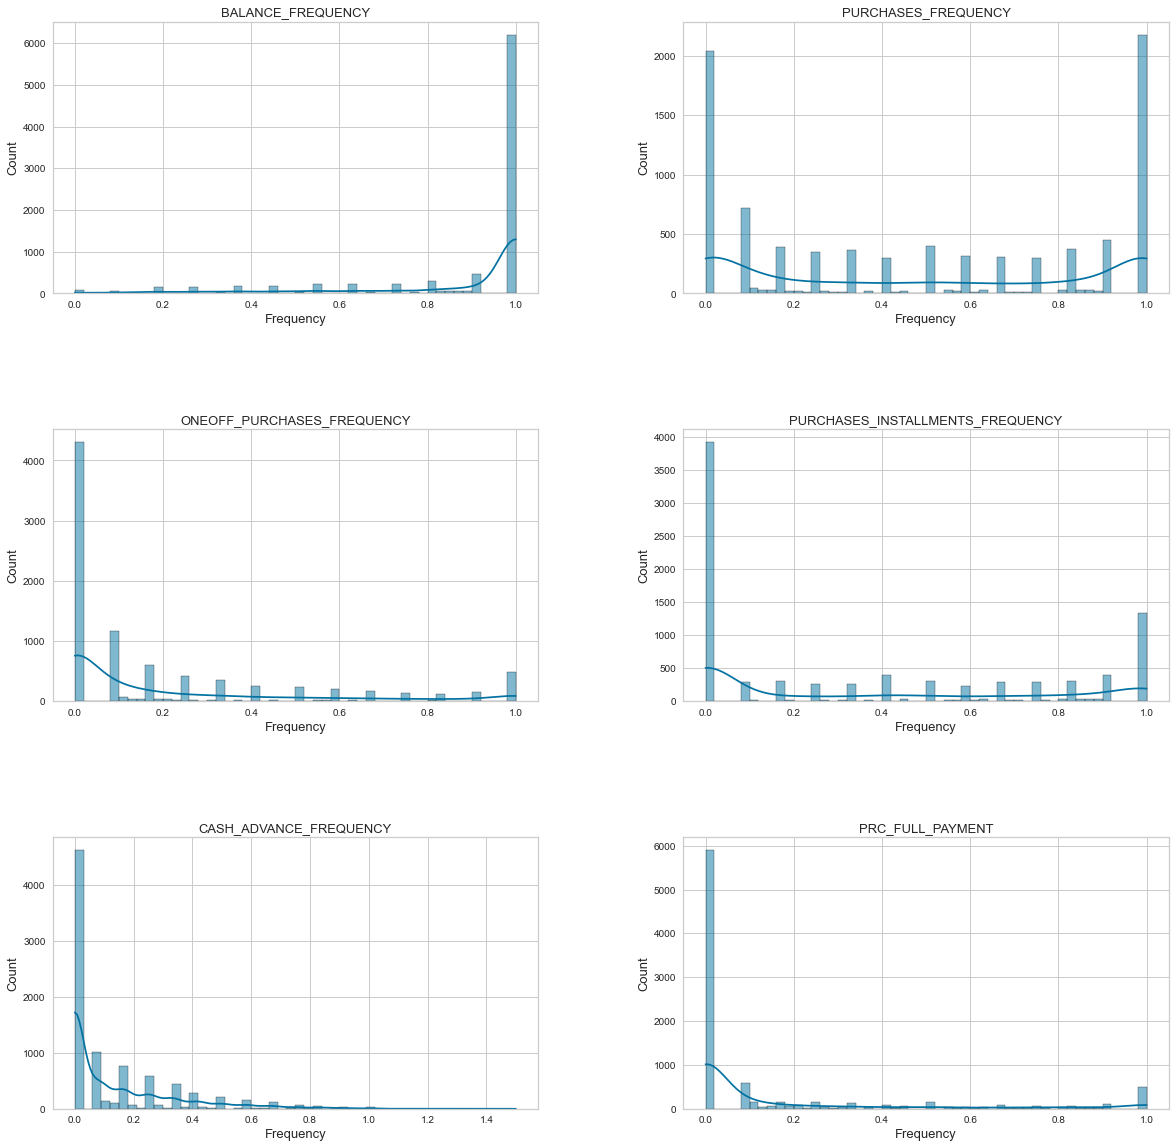

In [ ]:

var_freq = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_freq):
    plt.subplot(3,2,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,kde=True)
    plt.savefig('variabel_frekuensi.png')
    


Beberapa fitur mengalami frekuensi yang cukup jarang, terkecuali untuk PURCHASES_FREQUENCY yang memiliki frekuensi cukup merata antara frekuensi yang cukup sering dan tidak.

## Cek Variabel yang lain untuk melihat distribusi data

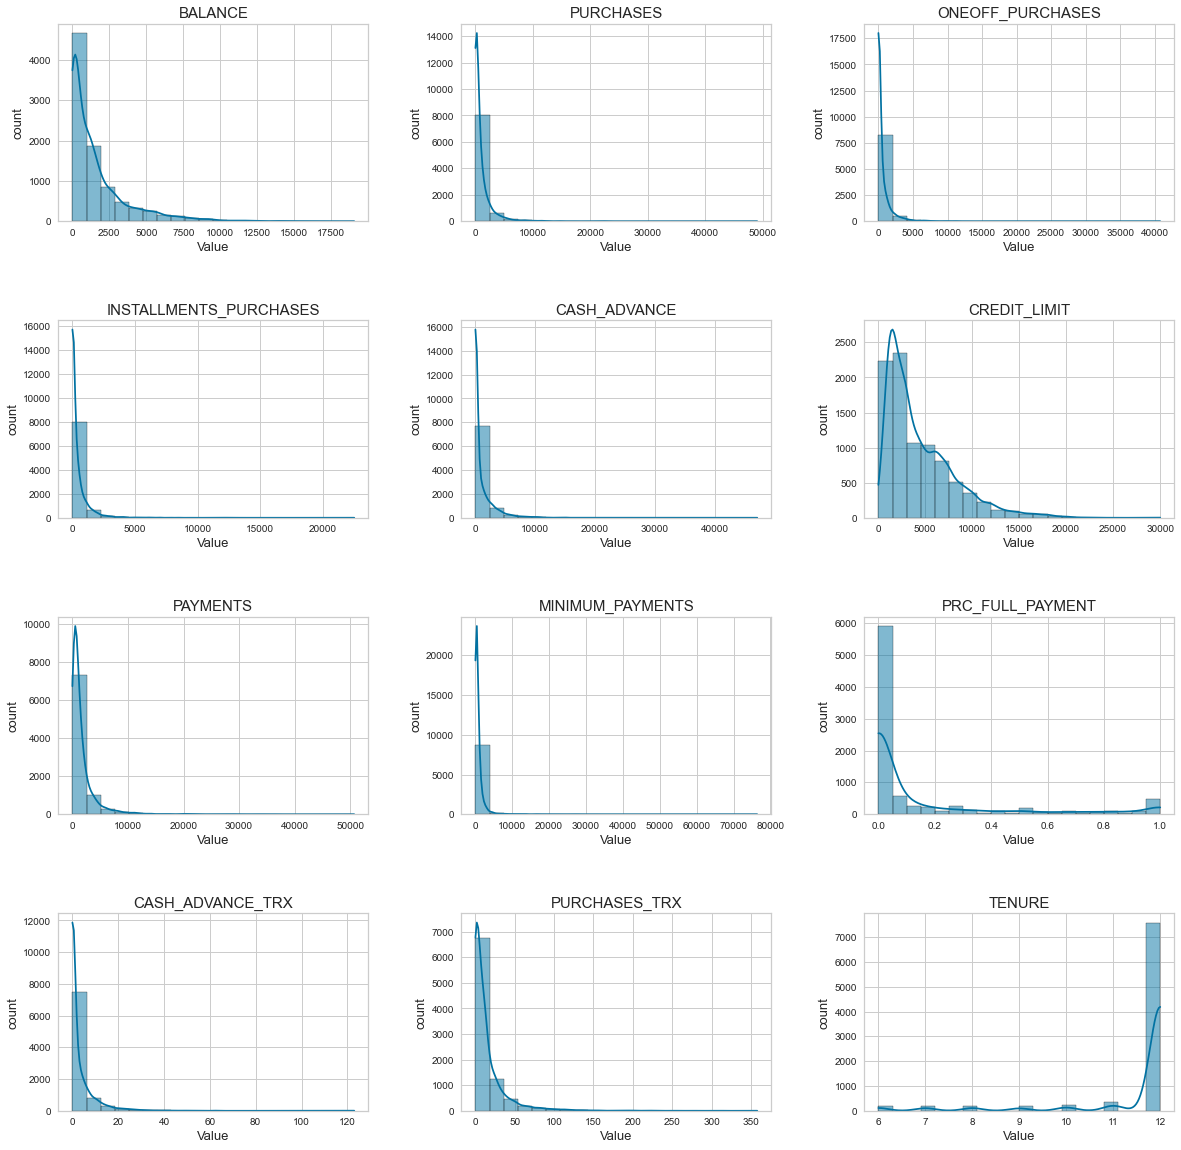

In [ ]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.savefig('variabel_cek.png')


Seperti dapat terlihat di atas, memiliki skewnees sehingga fitur-fitur di atas memiliki distribusi tidak normal.

## Cek Outliers

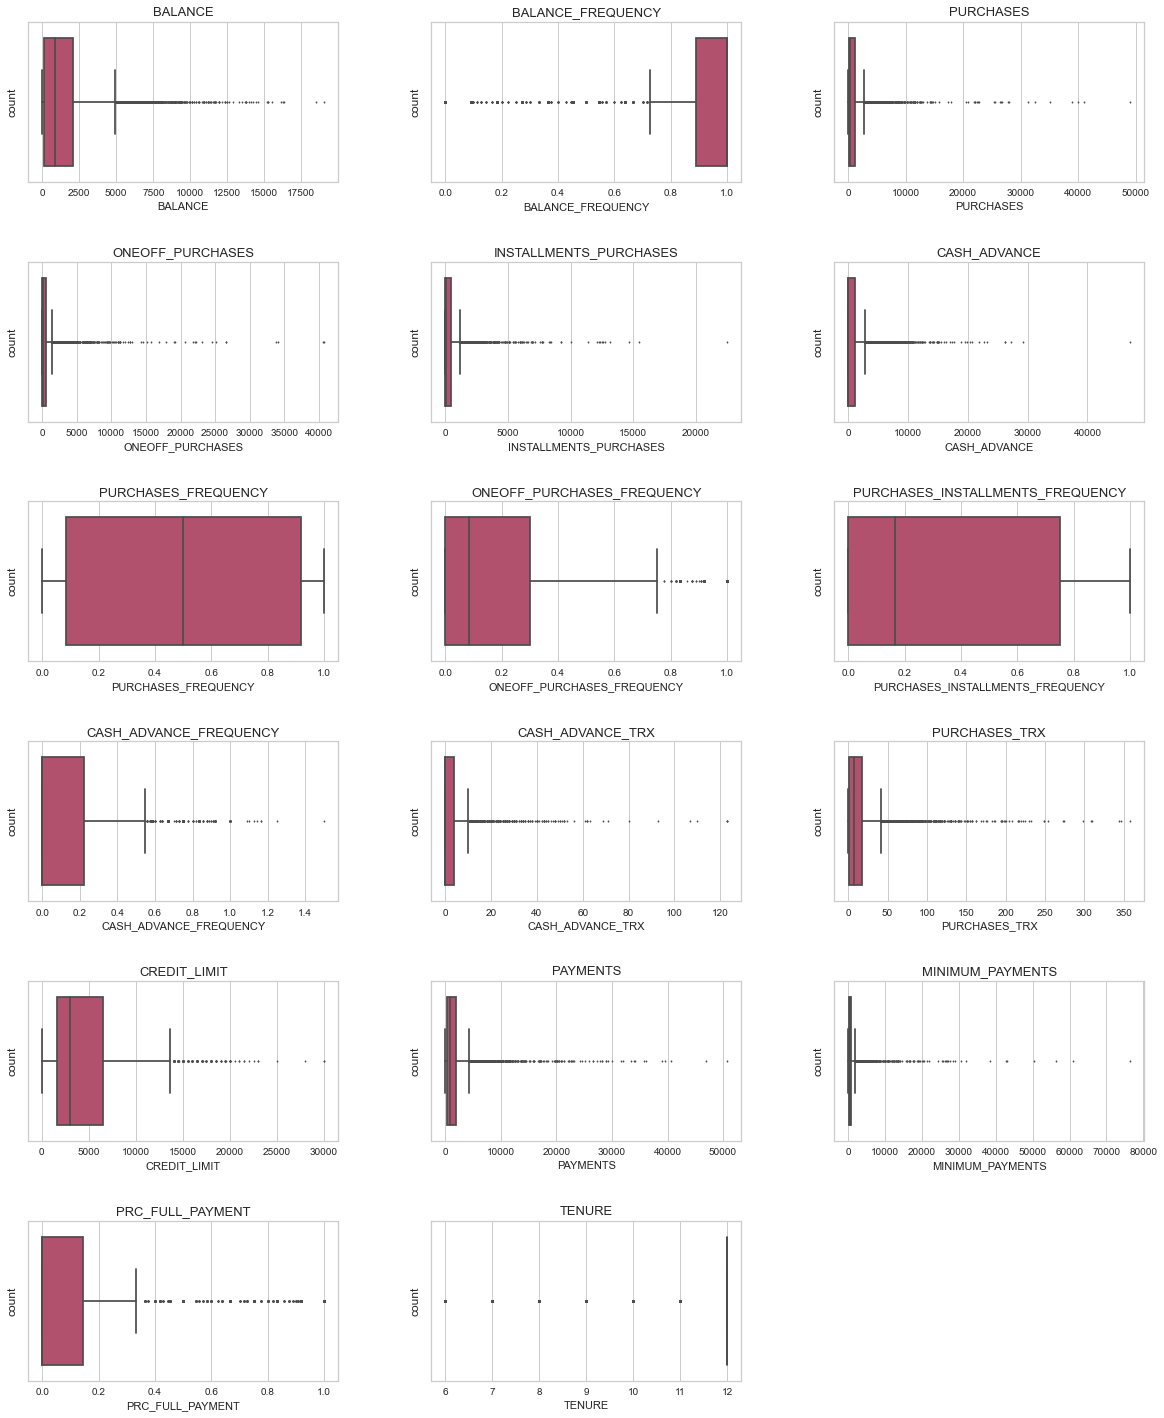

In [ ]:
#Cek Outliers
cols = df.columns.to_list()
plt.figure(figsize =(20,25))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)
    plt.savefig('outliers_cek.png')

Dari visualisasi di atas, dapat terlihat bahwa terdapat outlier, namun outlier tersebut terlihat seperti outlier normal, bukan dari kesalahan input. Hal ini mungkin terjadi dikarenakan ada nasabah yang bertransaksi dalam jumlah sangat besar.



#### Cek Correlation Matrix

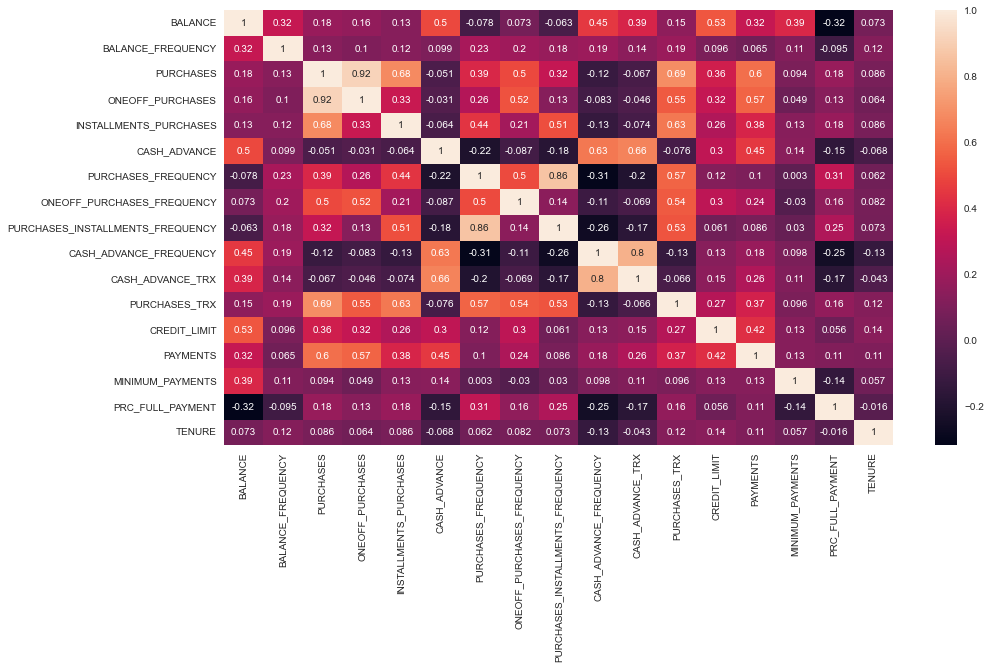

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr_matrix.png')


Kemudian digunakan metode PCA untuk mempertahankan informasi dan mendapatkan variabel independent.

## Preprocessing Data

### Scaling data
Pada projek ini akan dipilih teknik yang paling optimal untuk menghasilkan score dengan 3 metode data scaler, yaitu : MinMax Scaler, Robust Scaler, dan Standard Scaler.


In [ ]:
MM_scaler = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
RB_scaler = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
SS_scaler = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [ ]:
MM_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.082154,0.109306,0.0,0.006736,0.045864,0.107868,1.0
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.0
PURCHASES,8950.0,0.020457,0.043570,0.0,0.000808,0.007367,0.022637,1.0
ONEOFF_PURCHASES,8950.0,0.014534,0.040722,0.0,0.000000,0.000932,0.014166,1.0
INSTALLMENTS_PURCHASES,8950.0,0.018270,0.040193,0.0,0.000000,0.003956,0.020828,1.0
CASH_ADVANCE,8950.0,0.020766,0.044491,0.0,0.000000,0.000000,0.023629,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.090096,0.133414,0.0,0.000000,0.000000,0.148148,1.0


In [ ]:
RB_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.358848,1.080833,-0.453504,-0.386894,2.951740e-17,0.613106,9.434627
BALANCE_FREQUENCY,8950.0,-1.104565,2.132138,-9.000009,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,8950.0,0.599652,1.995932,-0.337489,-0.300464,2.653585e-17,0.699536,45.472693
ONEOFF_PURCHASES,8950.0,0.960223,2.874738,-0.065812,-0.065812,0.000000e+00,0.934188,70.528052
INSTALLMENTS_PURCHASES,8950.0,0.687243,1.929718,-0.189912,-0.189912,0.000000e+00,0.810088,47.821611
CASH_ADVANCE,8950.0,0.878840,1.882855,0.000000,0.000000,0.000000e+00,1.000000,42.320270
PURCHASES_FREQUENCY,8950.0,-0.011579,0.481645,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.397082,0.994454,-0.277777,-0.277777,0.000000e+00,0.722223,3.055557
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.263694,0.529930,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,8950.0,0.608150,0.900547,0.000000,0.000000,0.000000e+00,1.000000,6.750007


In [ ]:
SS_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,4.195651e-16,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.209548e-14,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,-9.278518e-16,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,3.916048e-15,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,2.275424e-15,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,5.697020e-15,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,2.021052e-15,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,5.856519e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


## Reduksi Dimensi menggunakan PCA

PCA akan mempertahankan 90% varians dalam dataset dengan set n_components = 0.9

In [ ]:
pca = PCA(n_components=0.9, random_state=42)
pca_MM = pca.fit(MM_scaler)
pc_MM = ['PC'+str(n) for n in range(1, len(pca_MM.components_)+1)]
df_pca_MM = pd.DataFrame(pca_MM.transform(MM_scaler), columns=pc_MM)

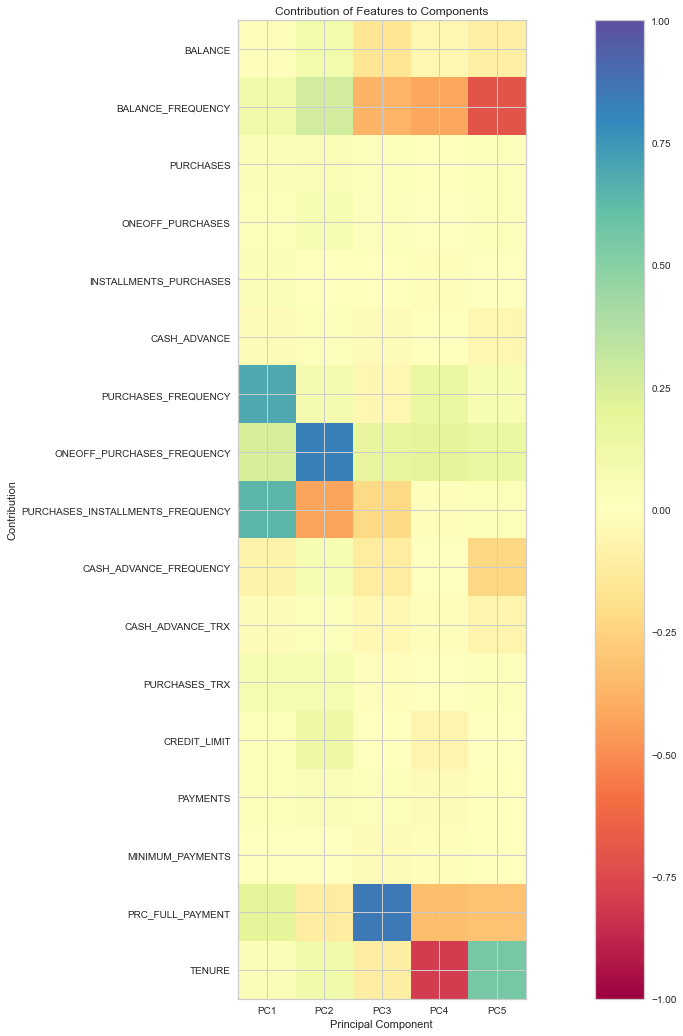

In [ ]:
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_MM.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(MM_scaler.columns)), MM_scaler.columns)
plt.xticks(range(len(df_pca_MM.columns)), df_pca_MM.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()


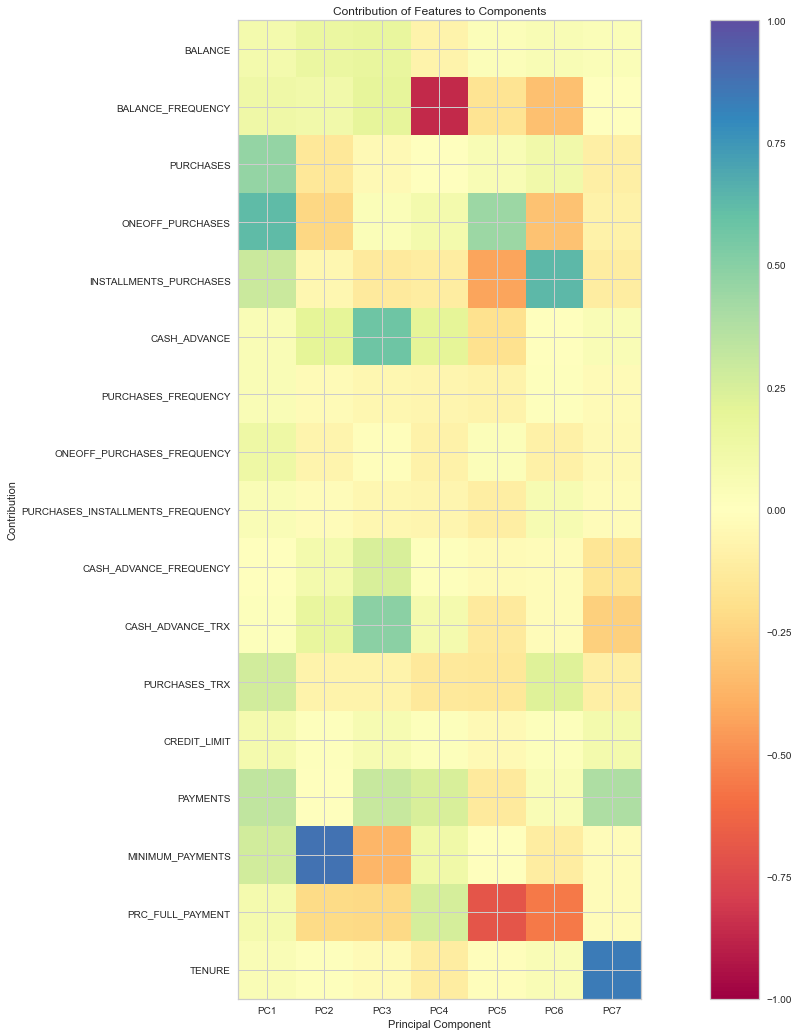

In [ ]:
pca_RB = pca.fit(RB_scaler)
pc_RB = ['PC'+str(n) for n in range(1, len(pca_RB.components_)+1)]
df_pca_RB = pd.DataFrame(pca_RB.transform(RB_scaler), columns=pc_RB)
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_RB.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(RB_scaler.columns)), RB_scaler.columns)
plt.xticks(range(len(df_pca_RB.columns)), df_pca_RB.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

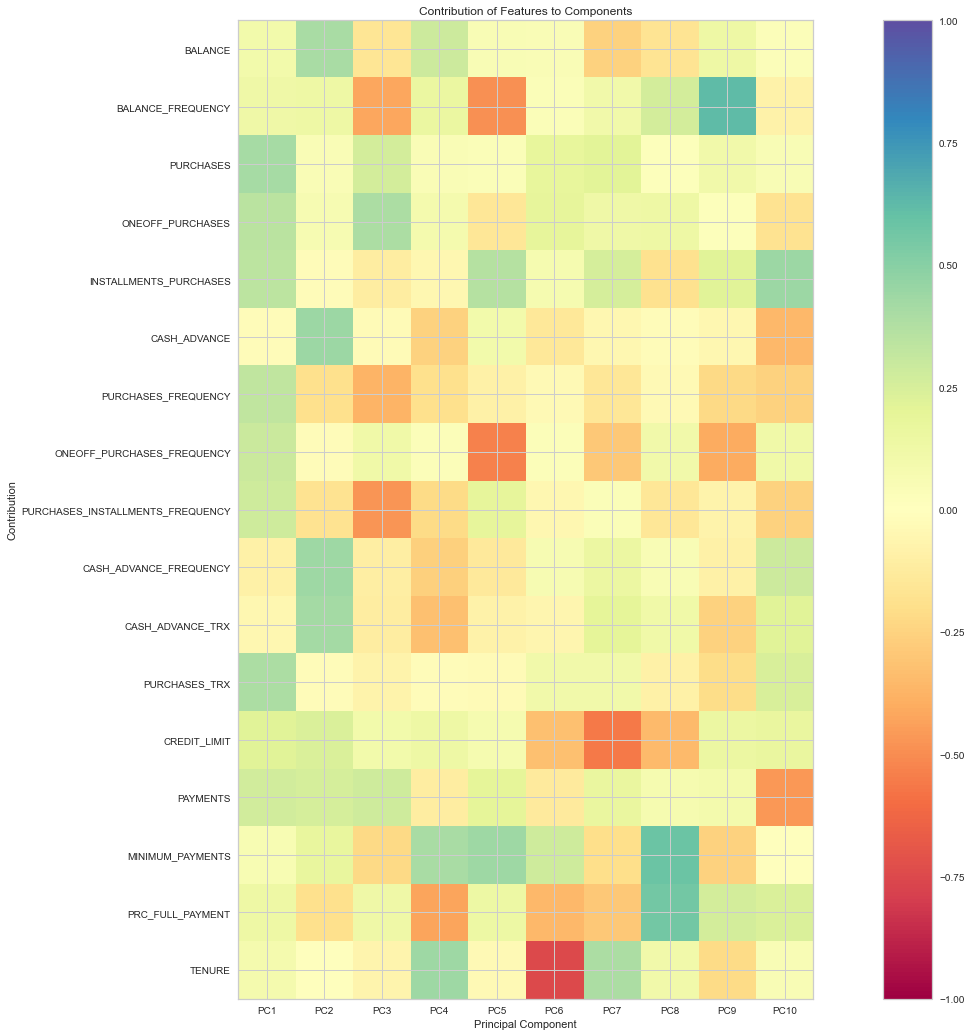

In [ ]:
pca_SS = pca.fit(SS_scaler)
pc_SS = ['PC'+str(n) for n in range(1, len(pca_SS.components_)+1)]
df_pca_SS = pd.DataFrame(pca_SS.transform(SS_scaler), columns=pc_SS)
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_SS.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(SS_scaler.columns)), SS_scaler.columns)
plt.xticks(range(len(df_pca_SS.columns)), df_pca_SS.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

## Clustering

##### Menemukan parameter n_clusters menggunakan metode elbow

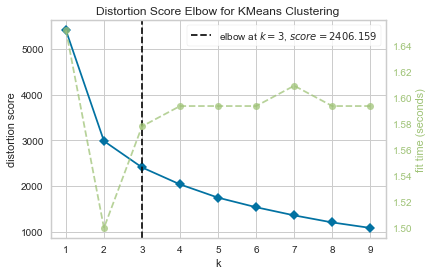

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer_MM = KElbowVisualizer(model, k=(1,10))
visualizer_MM.fit(df_pca_MM)
visualizer_MM.show()


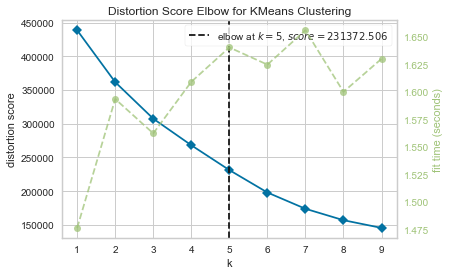

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method using RobustScaler dataframe
visualizer_RB = KElbowVisualizer(model, k=(1,10))
visualizer_RB.fit(df_pca_RB)
visualizer_RB.show()


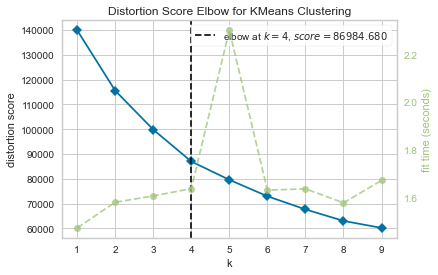

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method using StandardScaler dataframe
visualizer_SS = KElbowVisualizer(model, k=(1,10))
visualizer_SS.fit(df_pca_SS)
visualizer_SS.show()


dari hasil visualisasi diatas masing masing akan dilakukan percobaan dengan nilai k yang berbeda untuk mendapatkan hasil cluster yang optimal

## Membuat Model

In [ ]:
# create model Kmeans using dataframe Minmaxscaler
model_Kmeans_MM = KMeans(visualizer_MM.elbow_value_, random_state=42)
labels_MM = model_Kmeans_MM.fit_predict(df_pca_MM)

In [ ]:
# create model Kmeans using dataframe Robustscaler
model_Kmeans_RB = KMeans(visualizer_RB.elbow_value_, random_state=42)
labels_RB = model_Kmeans_RB.fit_predict(df_pca_RB)

In [ ]:
# create model Kmeans using dataframe Standardscaler
model_Kmeans_SS = KMeans(visualizer_SS.elbow_value_, random_state=42)
labels_SS = model_Kmeans_SS.fit_predict(df_pca_SS)

In [ ]:
MM_scaler['LABELS'] = labels_MM
df_pca_MM['LABELS'] = labels_MM

RB_scaler['LABELS'] = labels_RB
df_pca_RB['LABELS'] = labels_RB

SS_scaler['LABELS'] = labels_SS
df_pca_SS['LABELS'] = labels_SS

##### LIhat distribusi data antara 4 clusters

<AxesSubplot:title={'center':'Using StandardScaler'}, ylabel='LABELS'>

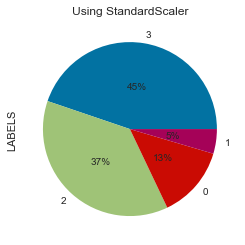

In [ ]:
df_pca_SS.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, title="Using StandardScaler")


##### LIhat distribusi data antara 3 clusters

<AxesSubplot:title={'center':'Using MinMax Scaler'}, ylabel='LABELS'>

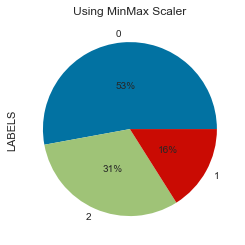

In [ ]:
df_pca_MM.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, 
                                         title="Using MinMax Scaler")


##### LIhat distribusi data antara 5 clusters

<AxesSubplot:title={'center':'Using RobustScaler'}, ylabel='LABELS'>

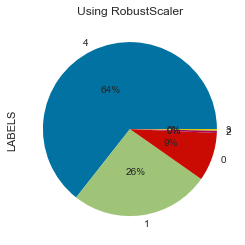

In [ ]:
df_pca_RB.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, 
                                         labeldistance=1.1, title="Using RobustScaler")


## Evaluasi Clusters

* Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
* Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.

In [ ]:
print("=========================using MinMaxScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_MM, labels_MM)}')
print(f'Silhouette Score = {silhouette_score(df_pca_MM, labels_MM)}')
print("========================================================================\n")

print("=========================using RobustScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_RB, labels_RB)}')
print(f'Silhouette Score = {silhouette_score(df_pca_RB, labels_RB)}')
print("========================================================================\n")

print("=========================using StandardScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_SS, labels_SS)}')
print(f'Silhouette Score = {silhouette_score(df_pca_SS, labels_SS)}')
print("========================================================================\n")

=========================using MinMaxScaler============================
Davies-Bouldin index = 0.7637431909603722
Silhouette Score = 0.5883262476576554

=========================using RobustScaler============================
Davies-Bouldin index = 1.0322424645815644
Silhouette Score = 0.34428519630421484

=========================using StandardScaler============================
Davies-Bouldin index = 1.3724191533464942
Silhouette Score = 0.2548969919626384



Dapat dilihat bahwa dengan menggunakan MinMaxScaler dapat menghasilkan hasil cluster yang optimal dapat dibuktikan dari score DBI paling mendekati 0 dan score Silhouette yang mendekati 1.

## Analisa Hasil Cluster

In [ ]:
def plotting(data, title):
    mean = data.groupby("LABELS").mean().to_numpy()
    name_cols = data.columns[0:-1]
    lines_plot = np.linspace(start=0, stop=2 * np.pi, num=len(name_cols))
    cat = np.arange(0, len(mean))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(mean)):
        plt.plot(lines_plot, mean[i], label=f'class {cat[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(lines_plot), labels=name_cols)
    plt.legend()
    plt.show()
   

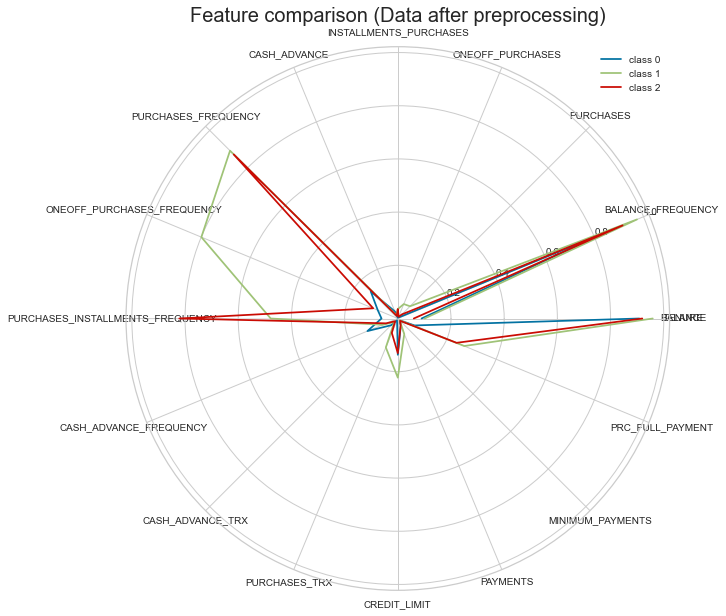

In [ ]:
plotting(MM_scaler, 'Data after preprocessing')

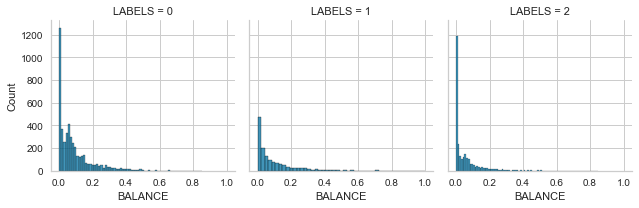

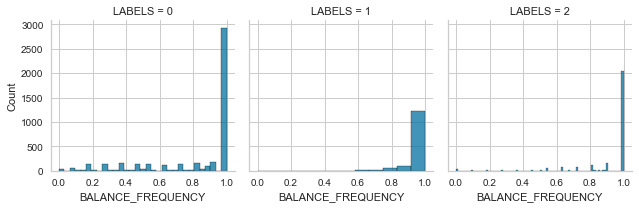

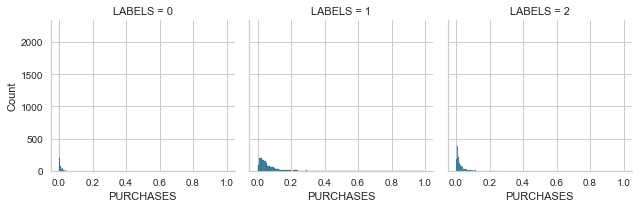

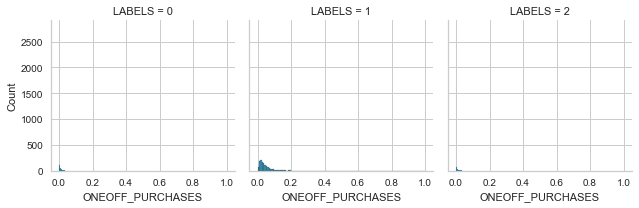

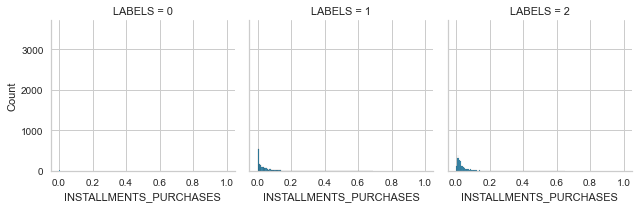

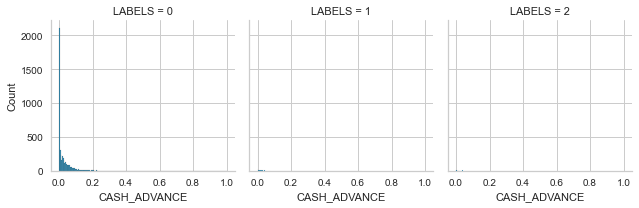

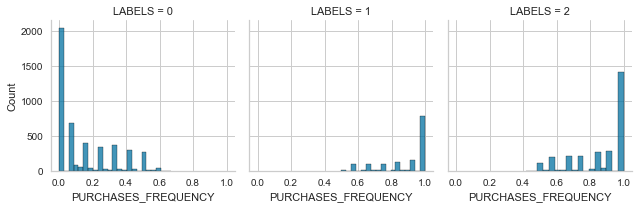

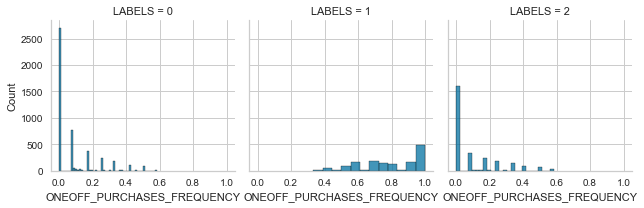

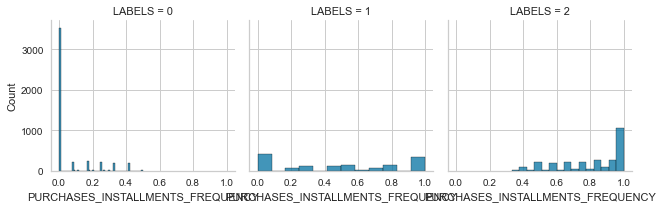

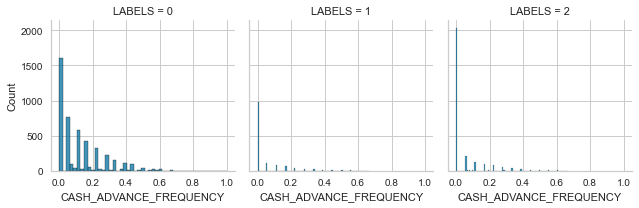

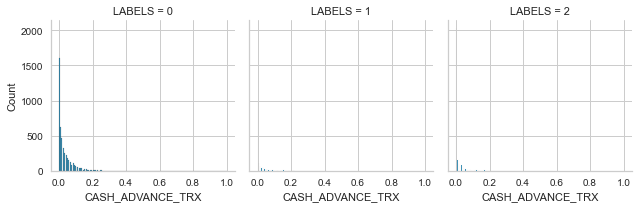

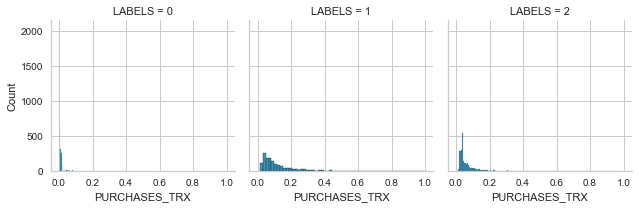

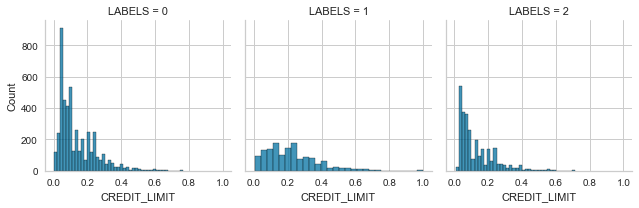

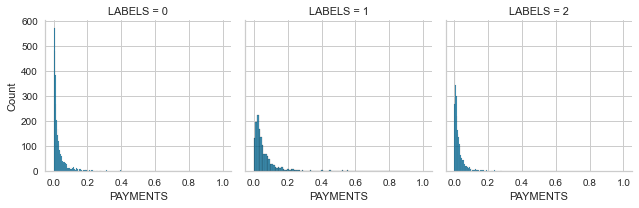

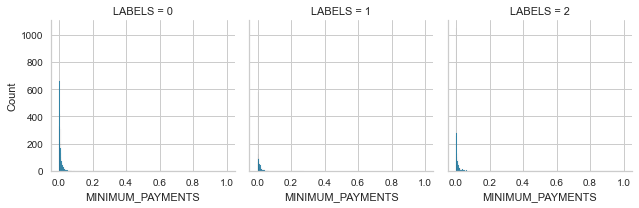

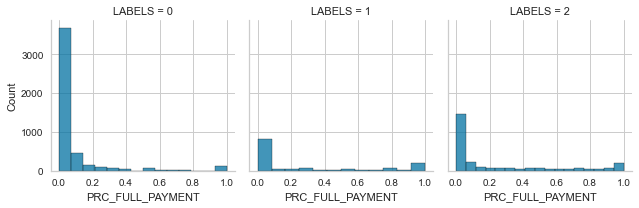

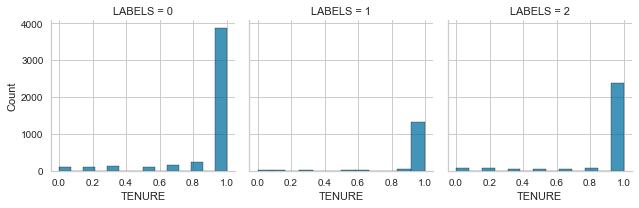

In [ ]:
for x in MM_scaler.drop('LABELS', axis=1).columns:
    plot = sns.FacetGrid(MM_scaler, col='LABELS')
    plot.map(sns.histplot, x)


#### Jumlah titik pada Cluster 0 : 4733, Cluster 1 : 1435, dan Cluster 2 : 2782
* Cluster 0 (Biru) : Tipe user yang memiliki limit kartu kredit medium, sangat jarang melakukan transaksi pembelian. Lebih sering menggunakan uang tunai, hampir tidak pernah menyicil.
* Cluster 1 (Hijau) : Tipe user yang memiliki limit kartu kredit dan balance paling tinggi, sering melakukan transaksi, hampir tidak pernah membayar dengan uang tunai. Lebih sering membayar dengan metode sekali bayar (One Off Purchases).
* Cluster 2 (Merah) : Tipe user yang memiliki limit kartu kredit paling rendah, sering menyicil dan frekuensi pembelian cukup tinggi.

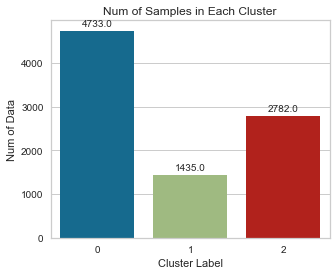

In [ ]:
x = pd.Series(MM_scaler.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
plt.savefig('jumlah_titik.png')

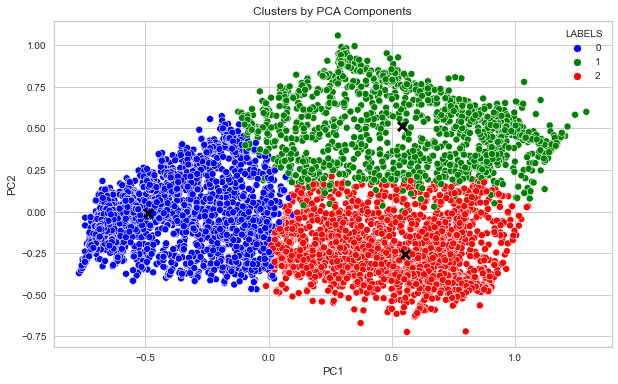

In [ ]:
x_axis = df_pca_MM['PC1']
y_axis = df_pca_MM['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x_axis, y_axis, hue=df_pca_MM['LABELS'], palette=['blue','green','red'])
centroid = model_Kmeans_MM.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()


### Simpan Model dalam Pickle

In [ ]:
import pickle
model_Kmeans_MM.fit(df_pca_MM)
pickle.dump(model_Kmeans_MM, open('./cc_cluster_model.pkl','wb'))

In [ ]:
MM_scaler.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'LABELS'],
      dtype='object')

In [ ]:
import pickle
pickle.dump(MM_scaler, open('scaler.pkl','wb'))